In [1]:
import matplotlib.pyplot as plt
import numpy as np

class PDF(object):
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

# Section: errata from in September

## Measuring the fI curve
Much better now:

In [2]:
PDF('../Figures/ThetaNeuronResponseToCurrentPeriod.pdf',(800, 400))

## Perturbations: recap
Try a perturbation of the Duffing equation:

\begin{align*}
\ddot{x}+x+\epsilon x^{3}=0, \quad 0<\varepsilon \ll 1 \hspace{10mm} x(0) = a, \dot{x}(0) = 0
\end{align*}

Say that $x(t)=x_{0}(t)+\varepsilon x_{1}(t)+\varepsilon^{2} x_{2}(t) + \mathcal{O}(\varepsilon^3)$:
\begin{align*}
0 &= \ddot{x_0} + \varepsilon\ddot{x_1} + \varepsilon^2 \ddot{x_2} + x_0 + \varepsilon x_{1} + \varepsilon^{2} x_2 + \epsilon (x_{0} + \varepsilon x_{1})^{3} + \mathcal{O}(\varepsilon^3)\\
&= \ddot{x_0} + \varepsilon\ddot{x_1} + \varepsilon^2 \ddot{x_2} + x_0 + \varepsilon x_{1} + \varepsilon^2 x_2 + \varepsilon (x_0^3 + \varepsilon 3 x_0^3 x_1^3 ) + \mathcal{O}(\varepsilon^3) \\
&= \ddot{x_0} + x_0 + \varepsilon \cdot \left(\ddot{x_1} + x_{1} + x_0^3\right) + \varepsilon^2 \cdot \left(\ddot{x_2} + x_2 + 3 x_0^3 x_1^3 \right) + \mathcal{O}(\varepsilon^3)
\end{align*}

This yields for the $\mathcal{O}(1)$:
\begin{align*}
0 &= \ddot{x_0} + x_0  \hspace{10mm} x_o = e^{ax} \\
&= a^2 e^{ax} + e^{ax} = e^{ax} \cdot \left(a^2 + 1\right) \rightarrow a = \pm i
\end{align*}

For $a_1 \neq a_2$ with $a_1 = \alpha + i \beta$ and $a_2 = \alpha - i \beta$ the solution is:
\begin{align*}
x_0(t) &= e^{\alpha x} \left( c_1 \cos \left( \beta t \right) + c_2 \sin \left( \beta t \right) \right) =  c_1 \cos t + c_2 \sin t \\
x_0(0) &= a = c_1 \\
x_0(t) &= a \cos t
\end{align*}


For the $\mathcal{O}(\varepsilon)$:
\begin{align*}
\ddot{x_1} + x_1 &= -x_0^3 = -a^3 \cos^3 t = -\frac{a^{3}}{4}(3 \cos t+\cos 3 t)
\end{align*}

The homogeneous solution is again $x_1(t) = a \cos t$, and we can split the particular solution in two parts. Suggest $x_{1,p_1} = A \cos t + B \sin t$:
\begin{align*}
\frac{d}{dt}\left( -A \sin t + B \cos t \right) + A \cos t + B \sin t &= -A \cos t - B \sin t + A \cos t + B \sin t = -\frac{3a^{3}}{4} \cos t 
\end{align*}

That does not work. Try $x_{1,p_1} = A t \cos t + B t \sin t$:
\begin{align*}
\frac{d}{dt}\left( A \cos t - A t \sin t + B \sin t + B t \cos t \right) + A t \cos t + B t \sin t &= -A \sin t - A \sin t - A t \cos t + B \cos t + B \cos t - B t \sin t = -\frac{3a^{3}}{4} \cos t \\
&
\begin{cases}
\mathcal{O}(\sin t): -A - A = 0 \\
\mathcal{O}(t \cos t): A = 0 \\
\mathcal{O}(\cos t): 2B = -\frac{3a^{3}}{4} \leftrightarrow B = -\frac{3a^{3}}{8}\\
\end{cases}
\end{align*}

Then the other particular solution: try $x_{1,p_2} = A \cos (3 t) + B \sin (3 t)$:
\begin{align*}
\frac{d}{dt}\left( - 3 A \sin t + 3 B \cos t \right) + A \cos (3 t) + B \sin (3 t) &= -9A \cos (3 t) -9 B \sin t(3 t) + A \cos (3 t) + B \sin (3 t) = -\frac{a^{3}}{4} \cos (3 t) \\
&
\begin{cases}
\mathcal{O}(\cos t): -9A + A = -8 A = -\frac{a^{3}}{4} \leftrightarrow A = \frac{a^{3}}{32}\\
\mathcal{O}(\sin t): B = 0
\end{cases}
\end{align*}

So now:
\begin{align*}
x(t) = a \cos t + \varepsilon \cdot \left( -\frac{3a^{3}}{8}t \sin t + \frac{a^{3}}{32} \cos (3 t) \right) + \varepsilon^{2} x_{2}(t) + \mathcal{O}(\varepsilon^3)
\end{align*}

And so on for the terms in $\varepsilon^2$.

## Solutions for I(t) on a slow timeframe

For the QIF neuron we were in trouble when using $\iota = V$ as that would change the model. Inseperable ode's like

\begin{align*}
\frac{dV}{dt} &= V^2 + \iota(t) \\
\end{align*}

cannot be solved exactly due to the power on $V^2$. However, we can perform pertubations!

### Perturbation on $\iota(t) = \iota_0 + \varepsilon t$
\begin{align*}
\frac{dV}{dt} &= V^2 + \iota_0 + \varepsilon t \hspace{10mm} V(t=0) = –\infty \\
\end{align*}

Take $V(t, \varepsilon) = V_0(t) + \varepsilon V_1(t) + \varepsilon^2 V_2(t) + \mathcal{O}(\varepsilon^3)$:

\begin{align*}
\frac{dV}{dt} &= V^2 + \iota_0 + \varepsilon t\\
\dot{V_0(t)} + \varepsilon \dot{V_1(t)} + \varepsilon^2 \dot{V_2(t)} &= \left( V_0(t) \right)^2 + \left( \varepsilon V_1(t) \right)^2  + 2 \varepsilon V_0(t) V_1(t) + 2 \varepsilon^2 V_0(t) V_2(t) + \mathcal{O}(\varepsilon^3) + \iota_0 + \varepsilon t \\
0 &= \left( -\dot{V_0(t)} + \left( V_0(t) \right)^2 + \iota_0 \right) + \varepsilon \cdot \left( -\dot{V_1(t)} +  2 V_0(t) V_1(t) + t \right) + \varepsilon^2 \cdot \left( -\dot{V_2(t)} + \left( V_2(t) \right)^2 + 2 V_0(t) V_2(t) \right)
\end{align*}

For $\mathcal{O}(1)$:

\begin{align*}
\dot{V_0(t)} &= \left( V_0(t) \right)^2 + \iota_0 \\
\int_{V_0(0)}^{V_0(t)} \frac{dv}{v^2 + \iota_0} 
&= \int_{V_0(0)}^{V_0(t)} \frac{1}{\iota_0 \left(\left(\frac{v}{\sqrt{\iota_0}}\right)^2 + 1 \right)} dv
\underset{x = \frac{v}{\sqrt{\iota_0}} \: \:dx = \frac{dv}{\sqrt{\iota_0}}}{=} 
\frac{1}{\sqrt{\iota_0}}\int_{\frac{V_0(0)}{\sqrt{\iota_0}}}^{\frac{V_0(t)}{\sqrt{\iota_0}}} \frac{1}{x^2 + 1} dx \\
&= \frac{1}{\sqrt{\iota_0}} \arctan(x) \rvert_{\frac{V_0(0)}{\sqrt{\iota_0}}}^{\frac{V_0(t)}{\sqrt{\iota_0}}} 
= \frac{1}{\sqrt{\iota_0}} \left( \arctan \left( \frac{V_0(t)}{\sqrt{\iota_0}} \right) - \arctan \left( \frac{V_0(0)}{\sqrt{\iota_0}} \right) \right) = \int_0^t d\tau = t
\end{align*}

So 

\begin{align*}
t &= \frac{1}{\sqrt{\iota_0}} \left( \arctan \left( \frac{V_0(t)}{\sqrt{\iota_0}} \right) - \arctan \left( \frac{V_0(0)}{\sqrt{\iota_0}} \right) \right) \\
V_0(t) &= \sqrt{\iota_0} \tan \left( t\sqrt{\iota_0} + \arctan \left( \frac{V_0(0)}{\sqrt{\iota_0}} \right) \right) \longrightarrow V_0(0) = -\infty \\
V_0(t) &= \lim_{V_0(0) \rightarrow -\infty} \sqrt{\iota_0} \tan \left( t\sqrt{\iota_0} + \arctan \left( \frac{V_0(0)}{\sqrt{\iota_0}} \right) \right) = \sqrt{\iota_0} \tan \left( t\sqrt{\iota_0} - \frac{\pi}{2} \right)\\
\end{align*}

Then

\begin{align*}
V_0(t) = - \sqrt{\iota_0} \cot \left( t\sqrt{\iota_0} \right)
\end{align*}


Now for $\mathcal{O}(\varepsilon)$:

\begin{align*}
\frac{d}{d\varepsilon}&: \dot{V_1(t)} + 2 \varepsilon \dot{V_2(t)} = 2 V_0(t) V_1(t) + 2 \varepsilon V_1(t)^2 + t\\
\frac{d}{d\varepsilon}\rvert_{\varepsilon = 0}&: \dot{V_1(t)} = 2 V_0(t) V_1(t) + t \\
\end{align*}

Change variables: $\frac{dx}{dt} - 2 V_0(t) x = \frac{dx}{dt} + p(t) x = t$. Recognise that this is an inseperable differential equation! Take 

\begin{align*}
\mu &= \exp \left\{ \int p(t)dt \right\} \\
\int p(t)dt &= - 2\int V_0(t)dt = 2\sqrt{\iota_0} \int \cot \left( t\sqrt{\iota_0} \right) dt
\underset{x = t \sqrt{\iota_0} \: \:dx = \sqrt{\iota_0} dt}{=} 
2\int \cot (x) dx \\
&= 2\int \frac{\cos(x)}{\sin(x)} dx
\underset{u = \sin(x) \: \:du = \cos(x) dx}{=} 
2\int \frac{1}{v} dx = 2 \cdot \ln \lvert v \rvert = 2 \cdot \ln \lvert \sin \left(t \sqrt{\iota_0} \right) \rvert \\
\mu &= \exp \left\{ 2 \cdot \ln \lvert \sin \left(t \sqrt{\iota_0} \right) \rvert \right\} = \lvert \sin \left(t \sqrt{\iota_0} \right) \rvert^2 = \left( \sqrt{\sin^2 \left(t \sqrt{\iota_0} \right) } \right)^2 = \sin^2 \left(t \sqrt{\iota_0} \right)
\end{align*}

Now we can say that $\frac{d\mu}{dt} = \mu p(t)$ and that $x = \frac{1}{\mu} \int \mu p(t) dt$ (see theory on inseperable equations [here](https://en.wikipedia.org/wiki/Inseparable_differential_equation)):

\begin{align*}
\int \mu p(t) dt &= 2\sqrt{\iota_0} \int \sin^2 \left(t \sqrt{\iota_0} \right) \cdot \frac{ \cos \left( t\sqrt{\iota_0} \right)}{\sin \left( t\sqrt{\iota_0} \right)}dt \\
&= 2\sqrt{\iota_0} \int \sin \left(t \sqrt{\iota_0} \right) \cdot \cos \left( t\sqrt{\iota_0} \right) dt
\underset{x = t \sqrt{\iota_0} \: \:dx = \sqrt{\iota_0} dt}{=} 
2 \int \sin (x) \cdot \cos (x) dx
\underset{u = \sin(x) \: \:du = \cos(x) dx}{=} 
2 \int u du = 2 \frac{u}{2} = \sin^2 \left(t \sqrt{\iota_0} \right) + c_1
\end{align*}

That leaves us with:

\begin{align*}
x = V_1(t) &= \frac{\sin^2 \left(t \sqrt{\iota_0} \right) + c_1}{\sin^2 \left(t \sqrt{\iota_0} \right)}
= 1 + \frac{c_1}{\sin^2 \left(t \sqrt{\iota_0} \right)} \\
c_1 &= \left( V_1(t) - 1 \right) \cdot \sin^2 \left(t \sqrt{\iota_0} \right)
\end{align*}

Evaluate at $t = 0$ so that $V_1(0) = -\infty$?

\begin{align*}
c_1 &= \lim_{t \rightarrow 0} \left( V_1(t) - 1 \right) \cdot \sin^2 \left(t \sqrt{\iota_0} \right)
= \left( -\infty - 1 \right) \cdot \sin^2 (0) 
=\left( -\infty - 1 \right) \cdot 0 = 0
\end{align*}

So $V_1(t) = 1$? Doesn't seem to make sense, but this does not seem to depend on $V_1(0)$, only on $t=0$.


Then let's continue with $\mathcal{O}(\varepsilon^2)$:
\begin{align*}
\dot{V_2(t)} &= V_2(t)^2 + 2 \cdot V_0(t) \cdot V_2(t) \\
\dot{V_2(t)} \cdot \frac{1}{V_2(t)} &= V_2(t) + 2 \cdot V_0(t)
\end{align*}

This is again an inseperable equation, but there does not seem to exist an expression to solve this differential equation.

# Section: the learning window as a polynomial
We will investigate how to reduce the complexity of the learning window function. The properties of the learning window $W(s)$ are:
* $W$ is defined on an interval $[-\tau, \tau]$
* 


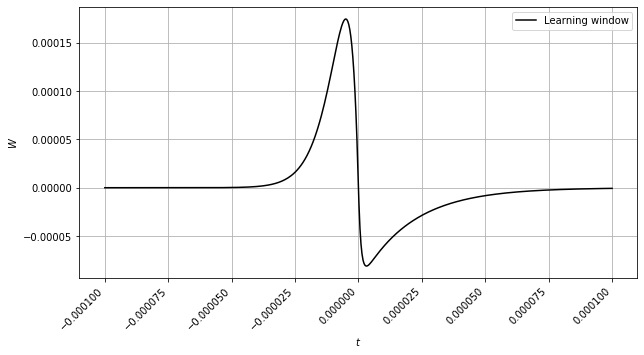

In [4]:
# Kempter 1999 learning window:
t_syn = 5.0e-6
t_pos = 1.0e-6
t_neg = 20.0e-6
A_p = 1
A_n = -1

def Window(t, t_syn, t_pos, t_neg, A_p, A_n):
    learning_rate = 10.0e-5
    eps = 1.0e-9
    
    W = np.zeros(t.shape)
    t_neg_idx = t <= 0
    t_pos_idx = t > 0
    W[t_neg_idx] = np.exp(t[t_neg_idx]/t_syn + eps)*(A_p*(1-t[t_neg_idx]/t_pos) + A_n*(1-t[t_neg_idx]/t_neg))
    W[t_pos_idx] = A_p*np.exp(-t[t_pos_idx]/t_pos + eps) + A_n*np.exp(-t[t_pos_idx]/t_neg + eps)
    return learning_rate * W

def Polynomial(t, t_pts, W_vls):
    pol = np.polyfit(t_pts, W_vls, t_pts.size-3)
    return np.polyval(pol,t) 
    
t = np.linspace(-1.0e-4, 1.0e-4, 500)
W_k = Window(t, t_syn, t_pos, t_neg, A_p, A_n)

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(t,W_k,'k',label="Learning window")

plt.xticks(rotation=45, ha="right")
plt.xlabel(r"$t$")
plt.ylabel(r"$W$")

plt.legend();


In [5]:
# Compute the area with a trapezoidal rule:
from np import trapz
integral = trapz(t,W_k)
print(integral)

-5.558565196844804e-10


# Section: making small-world networks from a fixed degree network
Real networks have since long displayed clustering and short mean paths. This is not necessarily reflected in the fixed-degree networks, nor the random networks. Let us try and make a small-world graph from an ordered network like a fixed-degree graph.

Start from $k^{in}_i \equiv k^{out}_j \equiv \langle k \rangle$ and $P(k| \langle k \rangle) = \delta_{k, \langle k \rangle}$. Change every link with probability $p$ so that only the in-degree changes. What we are after is similar behaviour as Strogatz-Watts *small world* networks. The idea is the following:
![Desire](https://www.researchgate.net/profile/Serhat_Tan/publication/283854902/figure/fig2/AS:296097986695169@1447606669288/Watts-Strogatz-1998-network-structure-with-varying-p-values-The-right-side-plot.png)

Our results: not so promising.
Drop small world networks: it is a *property*.

In [ ]:
PDF('../Figures/nosmallworldfromdirac.pdf',(800, 600))

Some graph properties of the adjacency matrices:

Fixed degree:
<img src="../Figures/FixedDegreeNetworkProperties.png" alt="Drawing" style="width: 500px;"/>

Random:
<img src="../Figures/RandomNetworkProperties.png" alt="Drawing" style="width: 500px;"/>

Scale-free:
<img src="../Figures/ScaleFreeNetworkProperties.png" alt="Drawing" style="width: 500px;"/>


# Section: making the adjacency matrices for full-scale simulations
Problem: most descriptions just use the degree distribution $P(k)$. We need to make $A_{ij}$ from $P(k)$. This is a *cover problem*.

\begin{align}
\text{Fixed degree networks:} \hspace{5mm} P(k| \langle k \rangle) &= \delta_{k, \langle k \rangle} \\ \\
\text{Random networks:} \hspace{5mm} P(k| \langle k \rangle) &= \mathcal{B}(N-1, \langle k \rangle) \sim \mathcal{P}(\langle k \rangle) \hspace{5mm} \text{(Poisson limit theorem)}\\ \\
\text{Scale-free networks:} \hspace{5mm} P(k|\gamma) &= A k ^{\gamma} \hspace{5mm} \forall k \in [k_{\rm min}, k_{\rm max}]
\end{align}

5000
4999.76396172484
5000.8174


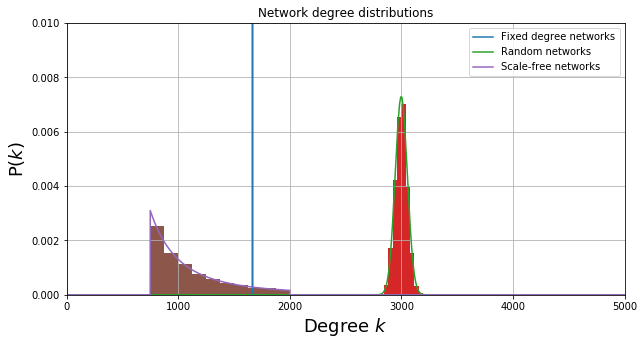

In [6]:
from scipy.stats import poisson

N = 5000
degrees = np.arange(0,N,1,dtype=np.uint16)

fixeddegree = int(N/3)
P_fixeddegree = np.zeros((N,),dtype=np.uint16)
P_fixeddegree[degrees == fixeddegree] = N
print(P_fixeddegree.sum())

d_fixeddegree = np.uint32(np.ones((N, 1))*fixeddegree)

p = 0.6
g = p*(N-1)
P_random = poisson.pmf(degrees, g)*N
print(P_random.sum())

d_random = np.uint32(poisson.rvs(g, size=(N, 1)))

kmin = int(N*3/20)
kmax = int(N*2/5)
degree = 3
P_scalefree = degrees.astype(np.float32)
idx = (P_scalefree < kmin) | (P_scalefree > kmax)
P_scalefree[idx] = 0
P_scalefree[np.invert(idx)] = np.power(P_scalefree[np.invert(idx)] + 1.0e-12, -degree)
A = N/(np.arange(kmin,kmax,1, dtype=np.float32)**(-degree)).sum()
P_scalefree = A*P_scalefree
print(P_scalefree.sum())

d_scalefree = np.uint32(np.random.choice(degrees, size=(N, 1), replace=True, p=P_scalefree/P_scalefree.sum()))

plt.figure(figsize=(10,5))
plt.xlim([0,N])
plt.ylim([0,0.01])
plt.plot(P_fixeddegree/N, label='Fixed degree networks')
plt.hist(d_fixeddegree, density=True, bins=1, range=(fixeddegree-1, fixeddegree+1))

plt.plot(P_random/N, label='Random networks')
plt.hist(d_random, density=True)

plt.plot(P_scalefree/N, label='Scale-free networks')
plt.hist(d_scalefree, density=True)

plt.ylabel(r'P($k$)', fontsize=18)
plt.xlabel(r'Degree $k$', fontsize=18)
plt.legend()
plt.title('Network degree distributions')
plt.grid(True);

We have the in- and out-degree vectors of the network defined in two ways:
\begin{align}
k^{in}_i, k^{out}_j \sim P(k) \longleftrightarrow  k^{in}_i = \sum_{j=1}^N A_{ij} \text{ and } k^{out}_j = \sum_{i=1}^N A_{ij}
\end{align}

Given constraints:
* $A_{ij}$ is directed, though $A_{ji} \neq A_{ji}$ necessarily.
* No selflinks are allowed: $A_{ii} = \bar{0}$
* The number of links is constant: $\sum_{i=1}^N k^{in}_i \equiv \sum_{j=1}^N k^{out}_j \equiv n(A_{ij})$. So we can say $k^{in}_i$ and $k^{out}_j$ are permutations of each other.

So we have:
* $N^2$ unknown parameters, the elements of $A_{ij}$. Minus $N$ diagonal elements that are zero.
* $2\cdot N$ equations, the row- and column-sums
* 1 equation making sure that $\sum_{i=1}^N k^{in}_i \equiv \sum_{j=1}^N k^{out}_j \equiv n(A_{ij})$

Result: $N^2 - (3N - 1)$ solutions

**Method 1:** row per row, draw number of links from $k^{in}_i$, distributed as $\sim k^{out}_j \longrightarrow$ though decent not exact.

**Method 2:** permute the rows. Per row draw number of links $L$ from $k^{in}_i$, permute $k^{out}_j$ and choose $L$ largest values. Permute indices of maxima back and draw these $\longrightarrow$ exact after 1-3 tries usually.

In [8]:
PDF('../Figures/A_fixeddegree1.pdf',(600, 600))

In [9]:
PDF('../Figures/A_fixeddegree2.pdf',(600, 600))

In [10]:
PDF('../Figures/A_random1.pdf',(600, 600))

In [11]:
PDF('../Figures/A_random2.pdf',(600, 600))

In [12]:
PDF('../Figures/A_scalefree1.pdf',(600, 600))

In [13]:
PDF('../Figures/A_scalefree2.pdf',(600, 600))

# Section: Full scale simulations
The network dynamics are described as follows:

\begin{align}
\frac{d \theta_i}{d t} &= (1 - \cos\theta_i) + (1 + \cos\theta_i)\cdot\left(\eta_i + I_i \right) \\
I_{i} &= \frac{K}{\langle k\rangle} \sum_{j=1}^{N} A_{i j} P_{n}\left(\theta_{j}\right)
\end{align}

Observe synchronization through the order parameter

\begin{align}
Z(t) = \frac{1}{N} \sum_{j=1}^N e^{\mathrm{i}\theta(t)_j}
\end{align}

For a fixed degree network it has been proven that the order parameter follows:

\begin{align}
\dot{\overline{Z}}(t)=-\mathrm{i} \frac{(\overline{Z}-1)^{2}}{2}+\frac{(\overline{Z}+1)^{2}}{2}\left(-\Delta+ \mathrm{i}\eta_{0}+ \mathrm{i} K\cdot \left(1+\frac{\overline{Z}^{2} + \overline{Z}^{*2} }{6}-\frac{4}{3} \operatorname{Re}(\overline{Z})\right)\right)
\end{align}

For an arbitrary network the order parameter follows a trajetory per degree:

\begin{align}
\frac{\partial z(k, t)}{\partial t} &=-\mathrm{i} \frac{(z(k, t)-1)^{2}}{2}+\frac{(z(k, t)+1)^{2}}{2} \cdot \left( -\Delta+\mathrm{i} \eta_{0}+\mathrm{i} K \cdot \left( \frac{1}{\langle k\rangle} \sum_{k^{\prime}} P\left(k^{\prime}\right) a\left(k^{\prime}, k\right) \right) \\
\times \left(1+\frac{z\left(k^{\prime}, t\right)^2+z^*\left(k^{\prime}, t\right)^2}{6}-\frac{4}{3} \operatorname{Re}\left(z\left(k^{\prime}, t\right)\right)\right) \right) \\
\overline{Z}(t) &= \frac{1}{N} \sum_{k \in \boldsymbol{k}} P(k) z(k, t)
\end{align}



The dynamics of these systems consist of three macroscopic states:
<table><tr>
<td> <img src="../Figures/ProblemsWithICs/PSS.png" width="400" height="400">
<td> <img src="../Figures/ProblemsWithICs/PSR.png" width="400" height="400">
<td> <img src="../Figures/ProblemsWithICs/CPW.png" width="400" height="400">
</tr></table>


No problem with simulations of equilibria:

In [27]:
PDF('../Figures/InspectMeanFieldFixedDegree.pdf',(800, 400))

Had some problems with simulations, and the initial conditions:
<img src="../Figures/ProblemsWithICs/1.png" width="800" height="400">
<img src="../Figures/ProblemsWithICs/2.png" width="800" height="400">
There is a difference in the IC!

In [47]:
PDF('../Figures/ProblemsWithICs/3.pdf',(800, 400))

We have a problem when working with  initial conditions: we have to match $Z(0)$ and $\overline{Z}(0)$ but the descriptions are different! We can however do:

\begin{align}
\overline{Z}(t) &= \frac{1}{N} \sum_{k} P(k) z(k, t) = \frac{1}{N} \sum_{k \in \boldsymbol{k}} P(k) \sum_{l \in \left\{\sum_j A_{ij} = k\right\}} e^{\mathrm{i}\theta(t)_l}
\end{align}

and then just take $\overline{Z}(0)$ from

\begin{align}
\overline{Z}(t) &= \frac{1}{N} \sum_{k \in \boldsymbol{k}} P(k) \frac{1}{P(k)}\sum_{l \in \left\{\sum_j A_{ij} = k\right\}} e^{\mathrm{i}\theta(t)_l}
\end{align}

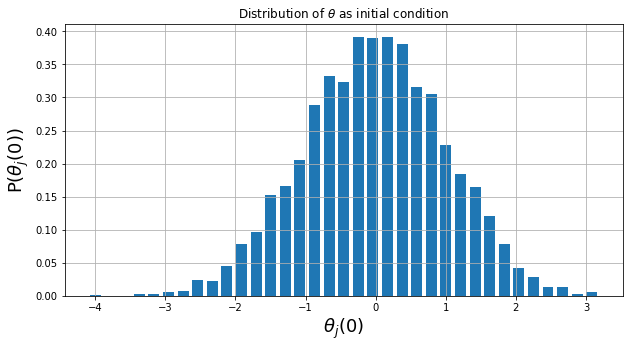

In [14]:
thetas_0 = np.random.randn(N, 1)
#thetas_0 = np.zeros((N,1))

plt.figure(figsize=(10,5))
plt.hist(thetas_0, bins=int(np.sqrt(N)/2), density=True, rwidth=0.75)
plt.ylabel(r'P($\theta_j(0)$)', fontsize=18)
plt.xlabel(r'$\theta_j(0)$', fontsize=18)
plt.title(r'Distribution of $\theta$ as initial condition')
plt.grid(True);


In [15]:
# Measure the order parameter of the initial conditions
z_0 = np.mean(np.exp(thetas_0*1j))
print(f"The initial condition is {z_0.real} + {z_0.imag} i.")

# Adjust initial conditions for the OA approach
Z_dist = []
for P, d in zip([P_fixeddegree, P_random, P_scalefree], [d_fixeddegree, d_random, d_scalefree]):
    ks = np.unique(d)
    l = ks.size
    zk_0 = np.zeros((1,l),dtype=complex)
    for i, k in enumerate(ks):
        zk_0[0,i] = np.exp(1j*thetas_0[d == k]).sum() / P[k];
    #zk_0 = z_0*np.ones((1,l),dtype=complex)
    Z_dist.append(zk_0)

    Z_0 = zk_0.dot(P[ks])/N
    
    print(f"The initial condition is {Z_0[0].real} + {Z_0[0].imag} i.")

The initial condition is 0.6020725863936186 + -0.00387934653665074 i.
The initial condition is 0.6020725863936186 + -0.00387934653665074 i.
The initial condition is 0.6020725863936186 + -0.003879346536650733 i.
The initial condition is 0.6020725863936186 + -0.00387934653665074 i.


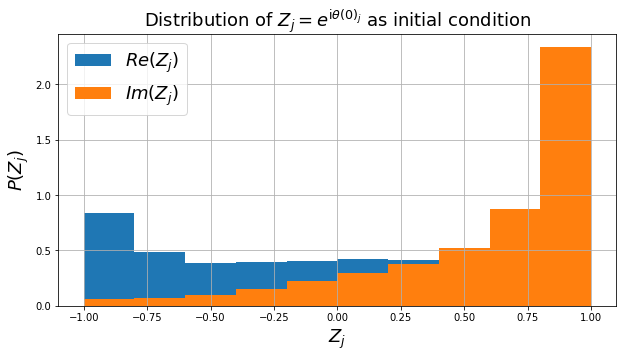

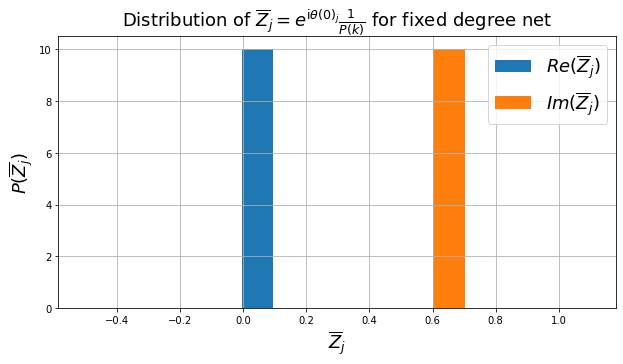

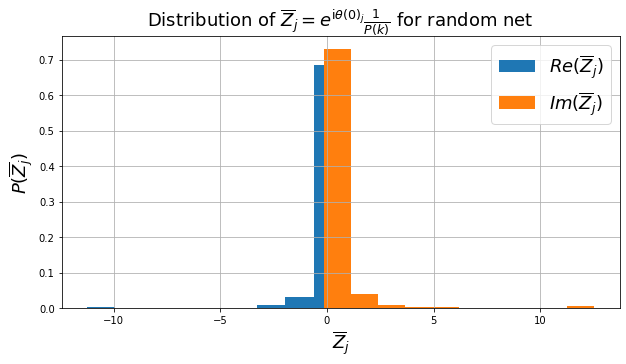

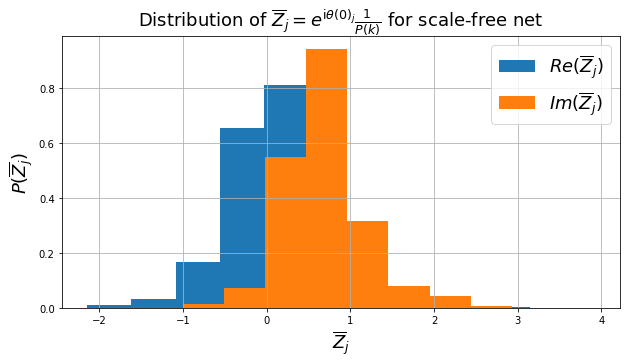

In [16]:
plt.figure(figsize=(10,5))
plt.hist(np.exp(thetas_0.flatten()*1j).imag, density=True, label=r'$Re(Z_j)$')
plt.hist(np.exp(thetas_0.flatten()*1j).real, density=True, label=r'$Im(Z_j)$')
plt.xlabel(r'$Z_j$', fontsize=18)
plt.ylabel(r'$P(Z_j)$', fontsize=18)
plt.title(r'Distribution of $Z_j =e^{\mathrm{i}\theta(0)_j}$ as initial condition', fontsize=18)
plt.legend(fontsize=18)
plt.grid(True);

for Z, net in zip(Z_dist, ['fixed degree', 'random', 'scale-free']):
    plt.figure(figsize=(10,5))
    plt.hist(Z.flatten().imag, density=True, label=r'$Re(\overline{Z}_j)$')
    plt.hist(Z.flatten().real, density=True, label=r'$Im(\overline{Z}_j)$')
    plt.xlabel(r'$\overline{Z}_j$', fontsize=18)
    plt.ylabel(r'$P(\overline{Z}_j)$', fontsize=18)
    plt.title(r'Distribution of $\overline{Z}_j = e^{\mathrm{i}\theta(0)_j} \frac{1}{P(k)}$ for '  + str(net) + ' net', fontsize=18)
    plt.legend(fontsize=18)
    plt.grid(True);


In [17]:
# Measure the order parameter of the initial conditions
z_0 = np.mean(np.exp(thetas_0*1j))
print(f"The initial condition is {z_0.real} + {z_0.imag} i.")

# Register same IC
Z_dist = []
for P, d in zip([P_fixeddegree, P_random, P_scalefree], [d_fixeddegree, d_random, d_scalefree]):
    ks = np.unique(d)
    l = ks.size
    zk_0 = z_0*np.ones((1,l),dtype=complex)
    Z_dist.append(zk_0)
    Z_0 = zk_0.dot(P[ks])/N
    
    print(f"The initial condition is {Z_0[0].real} + {Z_0[0].imag} i.")

The initial condition is 0.6020725863936186 + -0.00387934653665074 i.
The initial condition is 0.6020725863936186 + -0.00387934653665074 i.
The initial condition is 0.5966303100810634 + -0.003844280207039106 i.
The initial condition is 0.5737505597441107 + -0.003696858646524702 i.


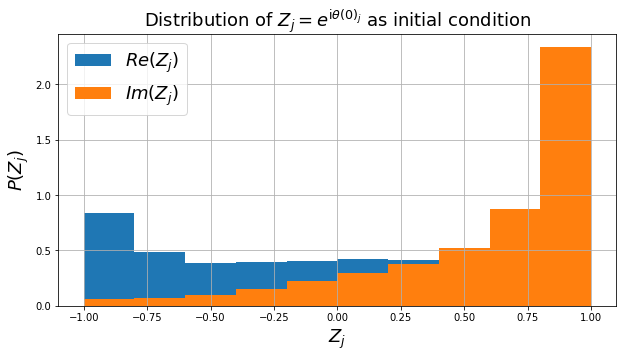

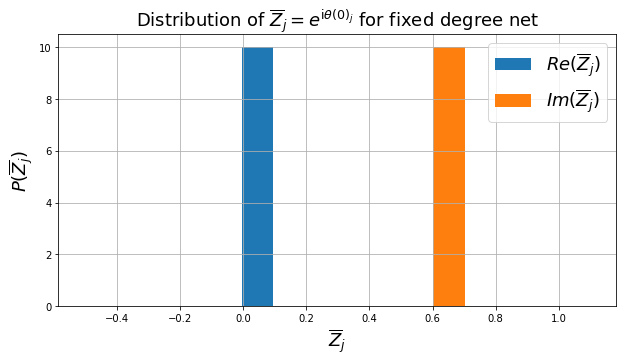

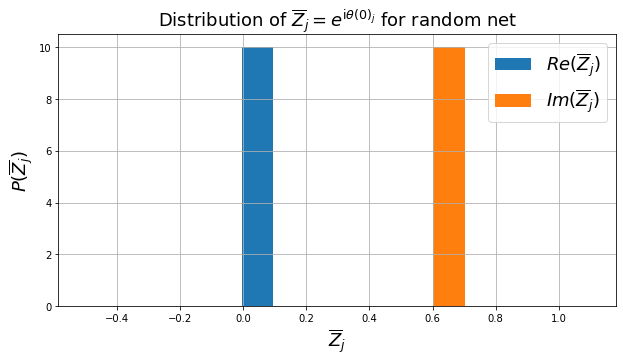

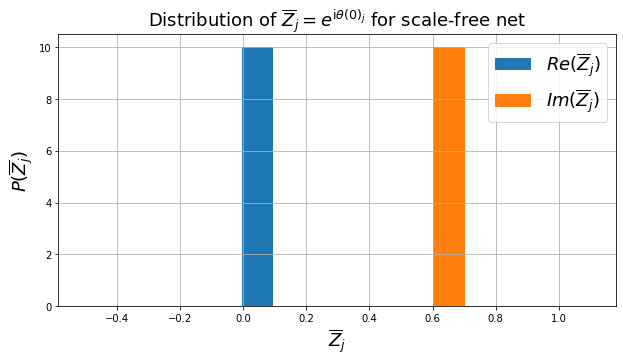

In [21]:
plt.figure(figsize=(10,5))
plt.hist(np.exp(thetas_0.flatten()*1j).imag, density=True, label=r'$Re(Z_j)$')
plt.hist(np.exp(thetas_0.flatten()*1j).real, density=True, label=r'$Im(Z_j)$')
plt.xlabel(r'$Z_j$', fontsize=18)
plt.ylabel(r'$P(Z_j)$', fontsize=18)
plt.title(r'Distribution of $Z_j =e^{\mathrm{i}\theta(0)_j}$ as initial condition', fontsize=18)
plt.legend(fontsize=18)
plt.grid(True);

for Z, net in zip(Z_dist, ['fixed degree', 'random', 'scale-free']):
    plt.figure(figsize=(10,5))
    plt.hist(Z.flatten().imag, density=True, label=r'$Re(\overline{Z}_j)$')
    plt.hist(Z.flatten().real, density=True, label=r'$Im(\overline{Z}_j)$')
    plt.xlabel(r'$\overline{Z}_j$', fontsize=18)
    plt.ylabel(r'$P(\overline{Z}_j)$', fontsize=18)
    plt.title(r'Distribution of $\overline{Z}_j = e^{\mathrm{i}\theta(0)_j}$ for '  + str(net) + ' net', fontsize=18)
    plt.legend(fontsize=18)
    plt.grid(True);


In [52]:
PDF('../Figures/ProblemsWithICs/4.pdf',(700, 400))

# Section: measuring synchrony within the system

Is there only synchronization on a global scale? No, there must be synchronization:
* across different node degrees 
* across parts of the network
* across excitabilities

### 1. Testing different order parameters: TimmeWithaut2017

The kuramoto order parameter:

\begin{align}
Z(t) = \frac{1}{N} \sum_{j=1}^N e^{\mathrm{i}\theta(t)_j}
\end{align}

Locally measured and weighed per degree:

\begin{align}
Z_i(t) &= \sum_{j=1}^{N} A_{ij}e^{\mathrm{i}\theta(t)_j} \\
Z_{\rm net}(t) &= \frac{\sum_{i=1}^{N} Z_i(t)}{\sum_{i=1}^{N} k_{i}}
\end{align}

A mean field 

